## 绘制violin

In [1]:
import numpy as np
import os
import json
import pandas as pd

In [2]:
head = range(1, 10)
weight_decay = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

In [3]:
ori_dir = r'E:\DATABASE\FirstGNN\220830_exp\kly'

with open(r'E:\DATABASE\FirstGNN\220830_exp\kly\m7_1\flowrecorder.json', 'r', encoding='utf-8') as f:
    ret_dic = json.load(f)

In [2]:
def acc_helper(f):
    tr_acc = []
    ts_acc = []
    for i in range(60, 100):
        tmp = f[f'{i}-th']
        tr_acc.append(tmp['ave_tr_acc'])
        ts_acc.append(tmp['ave_ts_acc'])
    
    return tr_acc, ts_acc

tr_note = pd.DataFrame(dtype=float)
ts_note = pd.DataFrame(dtype=float)
for i in range(1, 14):
    file_path = r'E:\DATABASE\FirstGNN\220831_exp\kly\m7_' + f'{i}'+ r'\flowrecorder.json'
    with open(file_path, 'r', encoding='utf-8') as f:
        ret_dic = json.load(f)
    tr, ts = acc_helper(ret_dic)
    tr_note[f'{i}-tr'] = tr
    ts_note[f'{i}-ts'] = ts


In [3]:
tr_mean = tr_note.mean(axis=0)
ts_mean = ts_note.mean(axis=0)

In [15]:
tr_id, ts_id = [], []
i = 5
p = 5
for j in range(5):
    ts_id.extend(range(j*p+(i-1)*1, j*p+i*1))
    tr_id.extend(range(j*p, j*p+(i-1)*1))
    tr_id.extend(range(j*p+i*1, (j+1)*p))

In [16]:
ts_id, tr_id

([4, 9, 14, 19, 24],
 [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23])

In [ ]:
ret_dic.keys()

In [8]:
ret_dic['1-th'].keys()

dict_keys(['ave_tr_loss', 'tr_loss', 'ave_tr_acc', 'tr_acc', 'ave_ts_loss', 'ave_ts_acc', 'ts_acc', 'logits', 'labels'])

In [7]:
len(ret_dic['1-th']['ts_acc'])
# 80-130

10

In [4]:
head_ts_acc = [8742, 8865, 8774, 8495, 8575, 8930, 8785, 8438, 8895]
head_tr_acc = [(99.00 + np.random.rand(1))*100 for i in range(9)]

for i in head_tr_acc:
    print(i)

[9937.59766748]
[9952.52142913]
[9996.44020644]
[9902.9952303]
[9939.2085102]
[9938.00581701]
[9937.51270118]
[9991.72529628]
[9979.06107756]


In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

In [12]:
dec_base = [0.00001, 0.00003]
w_dec = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

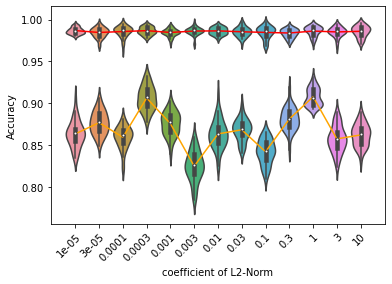

<Figure size 1200x800 with 0 Axes>

In [15]:
fig, ax = plt.subplots()
plt.figure(dpi=200)
sb.violinplot(data=ts_note, inner='box', scale='count', ax=ax)
sb.violinplot(data=tr_note, inner='box', scale='count', ax=ax)
# ax.set_ylim(0.95, 1)
ax.set_ylabel('Accuracy')
ax.set_xlabel('coefficient of L2-Norm')
ax.set_xticklabels(w_dec)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.plot(range(13), tr_mean, color='r', label='train acc mean')
ax.plot(range(13), ts_mean, color='orange', label='test acc mean')
# ax.legend()

In [25]:
fig.show()

D:\Temp/ipykernel_7372/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
